In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

2023-04-13 16:25:24.897282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [519]:
vueltas = pd.read_csv("vueltas_ham_final.csv")

In [520]:
vueltas

,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,AirTemp,makeStop,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,anyo,nextPit,Laptime,compound_MEDIUM,compound_SOFT
0,3.0,4.0,0,4,1.0,16.3,1,1,51.0,35.6,1.0,134.646,133.906,1.0,2018,25.0,132.826,0,1
1,4.0,5.0,0,4,1.0,15.9,0,1,52.0,34.0,1.0,133.632,128.681,1.0,2018,25.0,128.778,0,1
2,5.0,6.0,0,4,1.0,16.1,0,1,52.4,36.2,1.0,127.041,129.827,1.0,2018,25.0,130.440,0,1
3,6.0,7.0,0,4,1.0,16.7,0,0,51.5,36.6,1.0,119.521,133.232,1.0,2018,25.0,133.880,0,1
4,7.0,8.0,0,1,1.0,16.4,0,0,50.3,36.7,1.0,90.479,83.604,1.0,2018,25.0,82.990,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,61.0,16.0,0,1,4.0,36.4,0,0,11.0,48.1,4.0,87.069,87.394,6.0,2022,66.0,86.425,0,1
314,62.0,17.0,0,1,4.0,36.5,0,0,9.0,48.0,4.0,87.141,87.366,6.0,2022,66.0,86.804,0,1
315,63.0,18.0,0,1,4.0,36.5,0,0,8.0,48.0,4.0,87.404,87.865,6.0,2022,66.0,88.977,0,1
316,64.0,19.0,0,1,4.0,36.5,0,0,8.0,47.9,4.0,87.965,88.256,6.0,2022,66.0,89.833,0,1


In [521]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

In [522]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [523]:
vueltas_train.dtypes

LapNumber              float64
TyreLife               float64
FreshTyre              float64
TrackStatus            float64
Stint                  float64
AirTemp                float64
makeStop               float64
Rainfall               float64
Humidity               float64
TrackTemp              float64
posicionActual         float64
tiempoPilotoDelante    float64
tiempoPilotoDetras     float64
posicionSalida         float64
anyo                   float64
nextPit                float64
Laptime                float64
compound_MEDIUM        float64
compound_SOFT          float64
dtype: object

In [524]:
vueltas_test

,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,AirTemp,makeStop,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,anyo,nextPit,Laptime,compound_MEDIUM,compound_SOFT
254,2.0,3.0,0.0,1.0,2.0,36.9,1.0,0.0,6.0,49.4,19.0,91.197,113.833,6.0,2022.0,22.0,115.134,0.0,1.0
255,3.0,4.0,0.0,1.0,2.0,36.9,0.0,0.0,6.0,49.4,19.0,91.102,87.537,6.0,2022.0,22.0,87.495,0.0,1.0
256,4.0,5.0,0.0,1.0,2.0,37.0,0.0,0.0,6.0,49.5,19.0,90.425,87.693,6.0,2022.0,22.0,88.327,0.0,1.0
257,5.0,6.0,0.0,1.0,2.0,37.0,0.0,0.0,6.0,49.3,19.0,90.854,88.024,6.0,2022.0,22.0,89.321,0.0,1.0
258,6.0,7.0,0.0,2.0,2.0,36.9,0.0,0.0,6.0,49.5,19.0,91.335,88.784,6.0,2022.0,22.0,88.986,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,61.0,16.0,0.0,1.0,4.0,36.4,0.0,0.0,11.0,48.1,4.0,87.069,87.394,6.0,2022.0,66.0,86.425,0.0,1.0
314,62.0,17.0,0.0,1.0,4.0,36.5,0.0,0.0,9.0,48.0,4.0,87.141,87.366,6.0,2022.0,66.0,86.804,0.0,1.0
315,63.0,18.0,0.0,1.0,4.0,36.5,0.0,0.0,8.0,48.0,4.0,87.404,87.865,6.0,2022.0,66.0,88.977,0.0,1.0
316,64.0,19.0,0.0,1.0,4.0,36.5,0.0,0.0,8.0,47.9,4.0,87.965,88.256,6.0,2022.0,66.0,89.833,0.0,1.0


In [525]:
vueltas_test.shape

(64, 19)

In [526]:
scaler = StandardScaler()


In [527]:
scaler_train = scaler.fit(vueltas_train)
scaler_test = scaler.fit(vueltas_test)

In [528]:
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)

In [529]:
vueltas_train_scaler

array([[-1.65106248, -1.38534937, -0.82717019, ...,  9.27315041,
        -0.82717019,  0.82717019],
       [-1.59692929, -1.23034524, -0.82717019, ...,  8.41982269,
        -0.82717019,  0.82717019],
       [-1.54279609, -1.07534112, -0.82717019, ...,  8.77017612,
        -0.82717019,  0.82717019],
       ...,
       [ 1.59692929,  2.17974551, -0.82717019, ..., -1.50327403,
         1.20894105, -1.20894105],
       [ 1.65106248,  2.33474963, -0.82717019, ..., -1.50264162,
         1.20894105, -1.20894105],
       [ 1.70519568,  2.48975376, -0.82717019, ..., -1.44424938,
         1.20894105, -1.20894105]])

In [530]:
vueltas_test_scaler

array([[-1.70519568, -1.54035349, -0.82717019, ...,  5.5436361 ,
        -0.82717019,  0.82717019],
       [-1.65106248, -1.38534937, -0.82717019, ..., -0.28272871,
        -0.82717019,  0.82717019],
       [-1.59692929, -1.23034524, -0.82717019, ..., -0.10734119,
        -0.82717019,  0.82717019],
       ...,
       [ 1.59692929,  0.78470838, -0.82717019, ...,  0.02968031,
        -0.82717019,  0.82717019],
       [ 1.65106248,  0.93971251, -0.82717019, ...,  0.21012708,
        -0.82717019,  0.82717019],
       [ 1.70519568,  1.09471663, -0.82717019, ...,  0.59231165,
        -0.82717019,  0.82717019]])

In [531]:
df = pd.DataFrame(vueltas_test_scaler)

In [532]:
df[:40]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.705196,-1.540353,-0.827170,-0.179605,-1.220683,0.430552,4.509250,0.0,-0.785703,0.605015,1.383282,0.610515,3.750735,0.0,0.0,-1.298884,5.543636,-0.827170,0.827170
1,-1.651062,-1.385349,-0.827170,-0.179605,-1.220683,0.430552,-0.221766,0.0,-0.785703,0.605015,1.383282,0.580047,-0.524749,0.0,0.0,-1.298884,-0.282729,-0.827170,0.827170
2,-1.596929,-1.230345,-0.827170,-0.179605,-1.220683,0.835778,-0.221766,0.0,-0.785703,0.801568,1.383282,0.362924,-0.499384,0.0,0.0,-1.298884,-0.107341,-0.827170,0.827170
3,-1.542796,-1.075341,-0.827170,-0.179605,-1.220683,0.835778,-0.221766,0.0,-0.785703,0.408462,1.383282,0.500510,-0.445567,0.0,0.0,-1.298884,0.102196,-0.827170,0.827170
4,-1.488663,-0.920337,-0.827170,5.567764,-1.220683,0.430552,-0.221766,0.0,-0.785703,0.801568,1.383282,0.654774,-0.321998,0.0,0.0,-1.298884,0.031578,-0.827170,0.827170
5,-1.434530,-0.765333,-0.827170,-0.179605,-1.220683,0.835778,-0.221766,0.0,-0.785703,0.801568,1.383282,0.558239,-0.247369,0.0,0.0,-1.298884,0.065517,-0.827170,0.827170
6,-1.380397,-0.610329,-0.827170,5.567764,-1.220683,0.835778,-0.221766,0.0,-0.785703,0.801568,1.383282,0.656698,-0.277286,0.0,0.0,-1.298884,0.052658,-0.827170,0.827170
7,-1.326263,-0.455325,-0.827170,-0.179605,-1.220683,0.835778,-0.221766,0.0,-0.785703,0.998121,1.383282,0.780494,-0.089168,0.0,0.0,-1.298884,-0.048527,-0.827170,0.827170
8,-1.272130,-0.300320,-0.827170,-0.179605,-1.220683,0.835778,-0.221766,0.0,-0.785703,1.194674,1.383282,0.809358,-0.183471,0.0,0.0,-1.298884,-0.058646,-0.827170,0.827170
9,-1.217997,-0.145316,-0.827170,-0.179605,-1.220683,0.835778,-0.221766,0.0,-0.785703,1.194674,1.383282,5.822128,-0.147863,0.0,0.0,-1.298884,0.104304,-0.827170,0.827170


In [533]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 8 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 4])
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    testY.append(vueltas_test_scaler[i + future - 1:i + future, 4])


In [534]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [535]:
trainX.shape

(246, 8, 19)

In [536]:
trainY.shape

(246, 1)

In [537]:
testX.shape

(56, 8, 19)

In [538]:
testY.shape

(56, 1)

In [539]:
model = Sequential()
model.add(LSTM(40, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(20, activation='relu', return_sequences=False))
model.add(Dense(trainY.shape[1]))

In [540]:
model.compile(optimizer="adam", loss= "mse")
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 8, 40)             9600      
                                                                 
 lstm_21 (LSTM)              (None, 20)                4880      
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________


Epoch 1/16
14/14 [==============================] - 2s 28ms/step - loss: 15.0758 - val_loss: 5.3719
Epoch 2/16
14/14 [==============================] - 0s 8ms/step - loss: 4.8960 - val_loss: 1.0367
Epoch 3/16
14/14 [==============================] - 0s 10ms/step - loss: 3.3474 - val_loss: 1.0828
Epoch 4/16
14/14 [==============================] - 0s 8ms/step - loss: 2.8579 - val_loss: 0.7977
Epoch 5/16
14/14 [==============================] - 0s 8ms/step - loss: 2.6300 - val_loss: 0.6652
Epoch 6/16
14/14 [==============================] - 0s 10ms/step - loss: 2.3302 - val_loss: 0.6694
Epoch 7/16
14/14 [==============================] - 0s 10ms/step - loss: 1.9620 - val_loss: 0.6530
Epoch 8/16
14/14 [==============================] - 0s 8ms/step - loss: 1.5026 - val_loss: 0.6354
Epoch 9/16
14/14 [==============================] - 0s 8ms/step - loss: 1.1645 - val_loss: 0.6217
Epoch 10/16
14/14 [==============================] - 0s 8ms/step - loss: 1.1153 - val_loss: 0.6554
Epoch 11/16
14

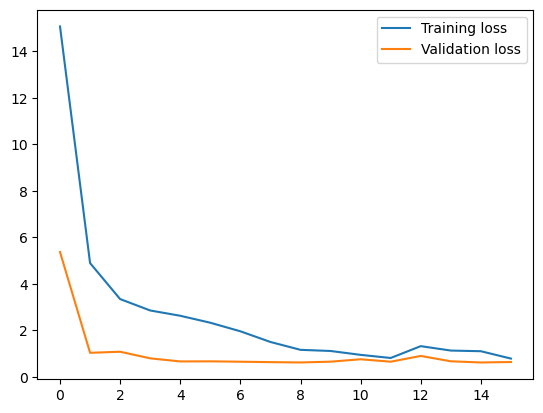

In [541]:
history = model.fit(trainX, trainY, epochs=16, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [542]:
prediction = model.predict(testX[:1]) #shape = (n, 1) where n is the n_days_for_prediction

1/1 [==============================] - 0s 241ms/step


In [543]:
prediction

array([[0.0701009]], dtype=float32)

In [544]:
testX.shape

(56, 8, 19)

In [545]:
prediction_copies = np.repeat(prediction, testX.shape[2], axis=-1)

In [546]:
prediction_copies

array([[0.0701009, 0.0701009, 0.0701009, 0.0701009, 0.0701009, 0.0701009,
        0.0701009, 0.0701009, 0.0701009, 0.0701009, 0.0701009, 0.0701009,
        0.0701009, 0.0701009, 0.0701009, 0.0701009, 0.0701009, 0.0701009,
        0.0701009]], dtype=float32)

In [547]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


In [548]:
y_pred_future

array([34.79497], dtype=float32)

In [432]:
testY

array([[-1.22068269],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 0.08137885],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038],
       [ 1.38344038]])